# **PROGRAM WYKRYWAJĄCY DOJRZAŁOŚĆ OWOCÓW - KONWOLUCYJNE SIECI NEURONOWE (CNN)**

CNN to algorytm, który może pobrać obraz wejściowy i sklasyfikować go wedle predefiniowanych kategorii (np. rasy psa). Sieci konwolucyjne poprzez trening są w stanie nauczyć się, jakie cechy szczególne obrazu pomagają w jego klasyfikacji. Ich przewagą nad standardowymi sieciami głębokimi jest większa skuteczność w wykrywaniu zawiłych zależności w obrazach. Jest to możliwe dzięki zastosowaniu filtrów badających zależności pomiędzy sąsiednimi pikselami.

# 0. Przydatne narzędzia po "surowym" przygotowaniu danych

**Program sprawdzający czy dany folder zawiera pliki z rozserzeniem .PNG lub .JPEG**

Możliwe formaty danych to:
*   PNG
*   JPEG
*   BMP
*   GIF






In [ ]:
import os
from PIL import Image

image_directory = "/content/drive/MyDrive/Colab Notebooks/DeepLearning/Strawberries/ripe"

for filename in os.listdir(image_directory):
    file_path = os.path.join(image_directory, filename)
    try:
        with Image.open(file_path) as img:
            if img.format != "JPEG" and img.format != "PNG" and img.format != "JPG":
                os.remove(file_path)
                print(f"Usunięto plik: {filename}")
    except:
        print(f"File: {filename}  Format: Nieznany format pliku")
        os.remove(file_path)

File: strawberries_1194-2383.avif  Format: Nieznany format pliku
File: strawberries-surface-strawberry_176474-501.png  Format: Nieznany format pliku
File: strawberries-cut-half-whole-berries-ripe-berries-top-view-background-ripe-strawberries-delicious-natural-dessert_166373-2358.png  Format: Nieznany format pliku
File: strawberry-berry-levitating-white-background_485709-57.png  Format: Nieznany format pliku
File: strawberries-white-textured-background-side-view_176474-3694.png  Format: Nieznany format pliku
File: strawberry_1205-667.png  Format: Nieznany format pliku
File: strawberry-red-fresh-juicy-mellow-fruit-half-cut-isolated-grey_179666-279.avif  Format: Nieznany format pliku


Program zmieniający rozerzenie pliku

In [ ]:
#RENAME FILE NAME
import os

j = 1
path = os.path.join('/content/drive/MyDrive/Colab Notebooks/DeepLearning/Strawberries/', 'overripe')
for k in os.listdir(path):
    old_filename = os.path.join(path, k)
    new_filename = os.path.join(path, f'img_{j}.jpg')
    os.rename(old_filename, new_filename)
    j +=1

  Zmiana lokalizacji plików:

In [ ]:
import os
import shutil

def move_images(source_folder, destination_folder):
    # # Sprawdź, czy folder docelowy istnieje, jeśli nie, utwórz go
    # if not os.path.exists(destination_folder):
    #     os.makedirs(destination_folder)

    # Pobierz listę plików w folderze źródłowym
    files = os.listdir(source_folder)

    for file in files:
        # Pełna ścieżka do pliku źródłowego
        source_path = os.path.join(source_folder, file)

        # Pełna ścieżka do pliku docelowego
        destination_path = os.path.join(destination_folder, file)

        # Przenieś plik ze źródłowego folderu do docelowego folderu
        shutil.move(source_path, destination_path)

    print("Przeniesiono pliki.")

# Przykładowe użycie:
source_folder = "/content/drive/MyDrive/Colab Notebooks/DeepLearning/Tomatoes/unripe"
destination_folder = "/content/drive/MyDrive/Colab Notebooks/DeepLearning/train_ds/unripe tomatoes"

move_images(source_folder, destination_folder)


Przeniesiono pliki.






**Program wykonujący losowe transformacje na zdjęciach powiekszając nasz dataset (PRZESTARZAŁE!!!)**


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,  # randomly rotate pictures (0-180)
    width_shift_range=0.2,  # randomly translate pictures vertically or horizontally
    height_shift_range=0.2,
    rescale=1. / 255,  # original images would be too high - we target values between 0 and 1
    shear_range=0.2,  # randomly applying shearing transformations
    zoom_range=0.4,  # randomly zooming inside pictures
    horizontal_flip=True,  # randomly flipping half of the images horizontally (if we not have symmetry)
    fill_mode='nearest')  # strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift

path = os.path.join('/content/drive/MyDrive/Colab Notebooks/DeepLearning/train_ds/', 'unripe tomatoes')
for j in os.listdir(path):
    img = load_img(os.path.join(path, j))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    # the .flow() command below generates batches of randomly transformed images
    # and saves the results to the `img/` directory
    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir=path, save_prefix='img_', save_format='png'):
        i += 1
        if i > 3:  # creates 10 image from 1 image
            break


Przykład transformacji:

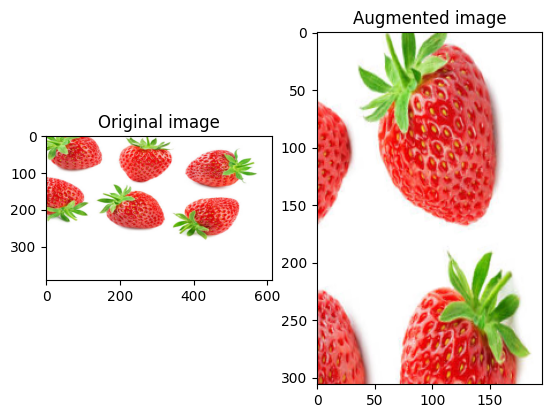

In [ ]:
# Ścieżka do foldera z obrazami
folder_path = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/train_ds/ripe strawberries'

# Funkcja do wyświetlania obrazków
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1, 2, 1)
    plt.title('Original image')
    plt.imshow(original)

    plt.subplot(1, 2, 2)
    plt.title('Augmented image')
    plt.imshow(augmented)

# Wybierz losowy obraz z foldera
image_files = os.listdir(folder_path)
random_image_file = tf.random.shuffle(image_files)[0]
image_path = os.path.join(folder_path, random_image_file.numpy().decode("utf-8"))

# Wczytaj obraz
image = tf.io.read_file(image_path)
image = tf.image.decode_image(image)

# Wykonaj losową transformację (np. obrót)
cropped1 = tf.image.flip_left_right(image) #odbicie lustrzane
cropped2 = tf.image.rot90(cropped1) #obrót o 90
cropped3 = tf.image.central_crop(cropped2, central_fraction=0.5) #kadrowanie

# Wyświetl obrazy
visualize(image, cropped3)


**Opcja 1: skorzystanie z programu z sekcji #1 - PRZESTARZAŁA**

**Opcja 2: https://www.tensorflow.org/guide/keras/preprocessing_layers?hl=pl#image_data_augmentation_2**

# 1. Wczytanie i przetworzenie danych

Zbiór danych składa się z 8 kategorii obrazków:


*   0: banan przedojrzały (overripe banana)
*   1: pomidor przejdorzały (overripe tomatoes)
*   2: banan dojrzały (ripe banana)
*   3: truskawka dojrzała (ripe strawberries)
*   4: pomidor dojrzały (ripe tomatoes)
*   5: banan niedojrzały (unripe banana)
*   6: truskawka niedojrzała (unripe strawberries)
*   7: pomidor niejdorzały (unripe tomatoes)








---


Importujemy potrzebne nam biblioteki

In [34]:
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow import keras
import numpy as np
import os

---




Definiujemy rozmiar danych oraz podajemy ścieżkę do naszego zbioru uczącego.

Ustalamy aby 20% datasetu odpowiadało zbiorowi walidacyjnemu (validation_split)

In [35]:
img_height, img_width = 64, 64

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/DeepLearning/train_ds",
    labels='inferred', # automatyczne etykietowanie klas
    label_mode = 'categorical',
    image_size=(img_height, img_width),
    #batch_size=32, %default
    shuffle=True, # wymieszanie danych przed kazdą epoką treningową
    seed=123, # ziarno dla generatora liczb losowych
    validation_split=0.3,  # przykładowy podział na zbiór walidacyjny
    subset = "training",
    color_mode='rgb'
)

# val_ds = tf.keras.utils.image_dataset_from_directory(
#     "/content/drive/MyDrive/Colab Notebooks/DeepLearning/val_ds",
#     labels='inferred', # automatyczne etykietowanie klas
#     image_size=(img_height, img_width),
#     batch_size=32,
#     shuffle=True, # wymieszanie danych przed kazdą epoką treningową
#     seed=123, # ziarno dla generatora liczb losowych
#     color_mode='rgb'
# )

Found 14332 files belonging to 8 classes.
Using 10033 files for training.


Metoda tf.keras.utils.image_dataset_from_directory automatycznie tworzy zbiór danych, który zawiera pary (dane wejściowe, etykiety) na podstawie struktury folderów, gdzie każdy folder reprezentuje inną klasę.

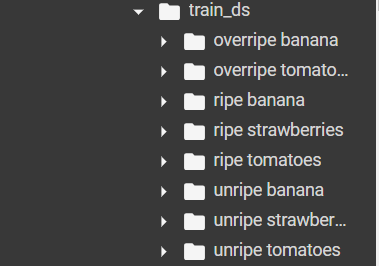

Dane wejściowe są tensorami reprezentującymi obrazy, a etykiety są tensorami reprezentującymi etykiety przypisane do tych obrazów.

Tensor etykiet o kształcie (32,) zawiera 32 etykiety odpowiadające tym obrazom np. [0 1 2 1 0 2 1 1 0 2 0 1 2 0 1 2 0 2 0 1 2])

Każdy obrazek jest trójwymiarowym tensorem o kształcie (wysokość, szerokość, kanały).


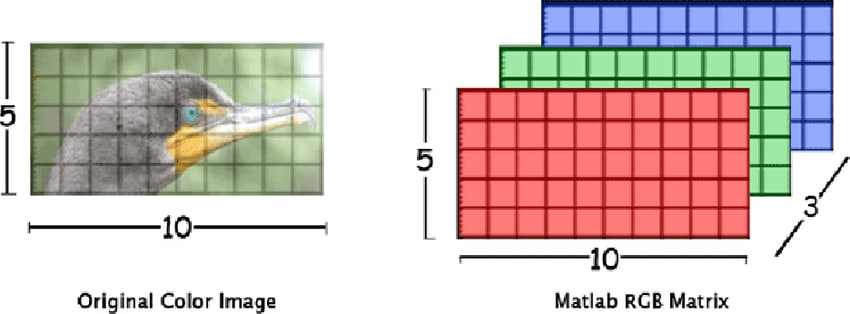



---


Wylistowanie ilości zdjęć w danym folderze:

In [ ]:
    for batch_num, (images, labels) in enumerate(train_ds.take(3)): # wyświetlenie trzech partii danych
      print(f"Batch {batch_num + 1}:")
      print(f"Dane wejściowe: {images.shape}") # kształt danych wejściowych (batch_size, img_height, img_width, num_channels)
      print(f"Etykiety: {labels.shape}") # kształt etykiet (batch_size)
      print()


Batch 1:
Dane wejściowe: (32, 64, 64, 3)
Etykiety: (32, 8)

Batch 2:
Dane wejściowe: (32, 64, 64, 3)
Etykiety: (32, 8)

Batch 3:
Dane wejściowe: (32, 64, 64, 3)
Etykiety: (32, 8)



In [ ]:
folder_glowny = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/train_ds'

for subdir, dirs, files in os.walk(folder_glowny):
    ilosc_zdjec = sum(1 for file in files if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')))
    nazwa_podfolderu = os.path.basename(subdir).upper()
    print(f"{nazwa_podfolderu}, ilość zdjęć: {ilosc_zdjec}")


TRAIN_DS, ilość zdjęć: 0
RIPE STRAWBERRIES, ilość zdjęć: 1612
UNRIPE STRAWBERRIES, ilość zdjęć: 1627
OVERRIPE TOMATOES, ilość zdjęć: 1506
RIPE TOMATOES, ilość zdjęć: 1906
UNRIPE TOMATOES, ilość zdjęć: 1400
RIPE BANANA, ilość zdjęć: 2111
UNRIPE BANANA, ilość zdjęć: 1691
OVERRIPE BANANA, ilość zdjęć: 2479




---


Format danych:

In [ ]:
for batch_num, (images, labels) in enumerate(train_ds.take(1)):
    image_np = images[0].numpy()  # Konwersja jednego obrazka na tablicę NumPy
    print(f"Skrócony kształt obrazka: {image_np.shape}")
    print()
    print(image_np[24:26])



Skrócony kształt obrazka: (64, 64, 3)

[[[2.55000000e+02 2.55000000e+02 2.55000000e+02]
  [2.46357422e+02 2.46357422e+02 2.46357422e+02]
  [4.57949219e+01 3.45761719e+01 2.15449219e+01]
  [2.55156250e+01 1.64218750e+01 1.43691406e+01]
  [2.27878906e+02 2.27712891e+02 2.26722656e+02]
  [2.49750000e+02 2.49466797e+02 2.48248047e+02]
  [2.53794922e+02 2.54000000e+02 2.53589844e+02]
  [2.36400391e+02 2.32707031e+02 2.28931641e+02]
  [1.83955078e+02 1.89648438e+02 1.56224609e+02]
  [8.14062500e+01 1.18701172e+02 6.85351562e+00]
  [7.53417969e+01 1.30929688e+02 5.93750000e-01]
  [7.74062500e+01 1.35406250e+02 0.00000000e+00]
  [9.43437500e+01 1.47677734e+02 1.70898438e+00]
  [1.01056641e+02 1.54498047e+02 0.00000000e+00]
  [1.05673828e+02 1.60093750e+02 0.00000000e+00]
  [1.07187500e+02 1.60113281e+02 3.12500000e-01]
  [1.12906250e+02 1.63906250e+02 6.25000000e-01]
  [1.13576172e+02 1.64625000e+02 0.00000000e+00]
  [1.11937500e+02 1.62250000e+02 3.12500000e-01]
  [1.06937500e+02 1.61937500e+

Dla przykładu, pierwszy wiersz tensora [[0.243, 0.169, 0.321], ... [0.129, 0.087, 0.415]] reprezentuje wartości pikseli dla pierwszego wiersza obrazka. Kolejne wiersze tensora odpowiadają kolejnym wierszom obrazka. Każdy element w wierszu to lista trzech wartości, które reprezentują intensywność kolorów (czerwony, zielony, niebieski) dla danego piksela.



---


Wyświetlenie klas

In [36]:
class_names = train_ds.class_names
print(class_names)

['overripe banana', 'overripe tomatoes', 'ripe banana', 'ripe strawberries', 'ripe tomatoes', 'unripe banana', 'unripe strawberries', 'unripe tomatoes']


# 2. Wyświetlenie przykładowych danych

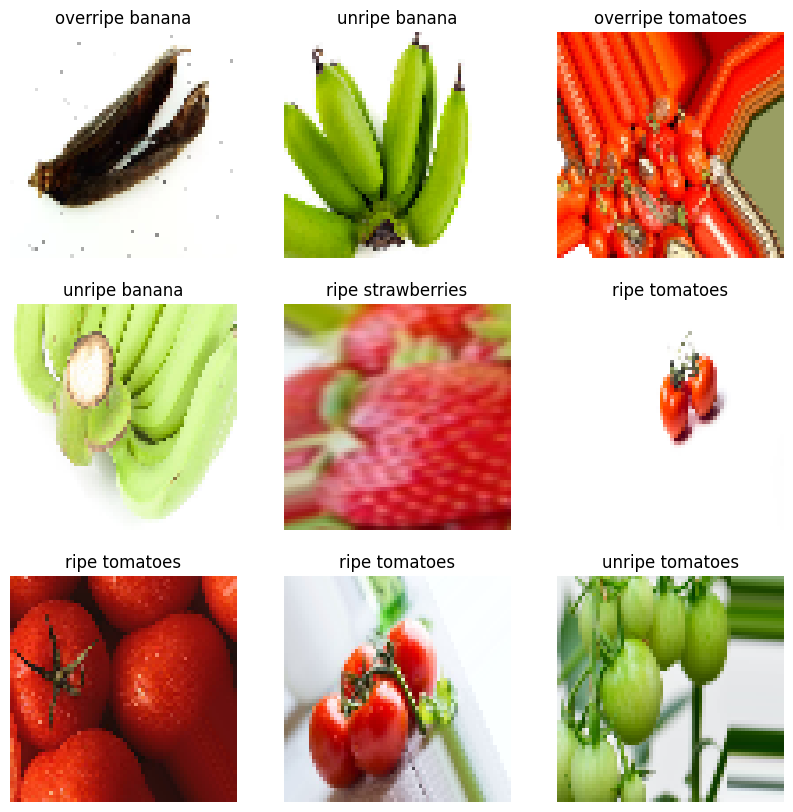

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        class_index = tf.argmax(labels[i]).numpy()
        plt.title(class_names[class_index])
        plt.axis("off")

plt.show()


# 3. Tworzymy nasz model


In [40]:
model = keras.models.Sequential([
    keras.layers.Rescaling(1./255, input_shape=(64, 64, 3)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),

    keras.layers.Dense(8, activation='softmax')
])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 256)       2

**Głównym celem korzystania z CNN jest automatyczne wykrywanie i rozpoznawanie wzorców oraz zmniejszenie kształtu wejściowego**

**Model Sequential** to prosty sposób definiowania modeli, w których warstwy są układane w sekwencji, a dane przechodzą przez nie w sposób liniowy, od warstwy wejściowej do warstwy wyjściowej.

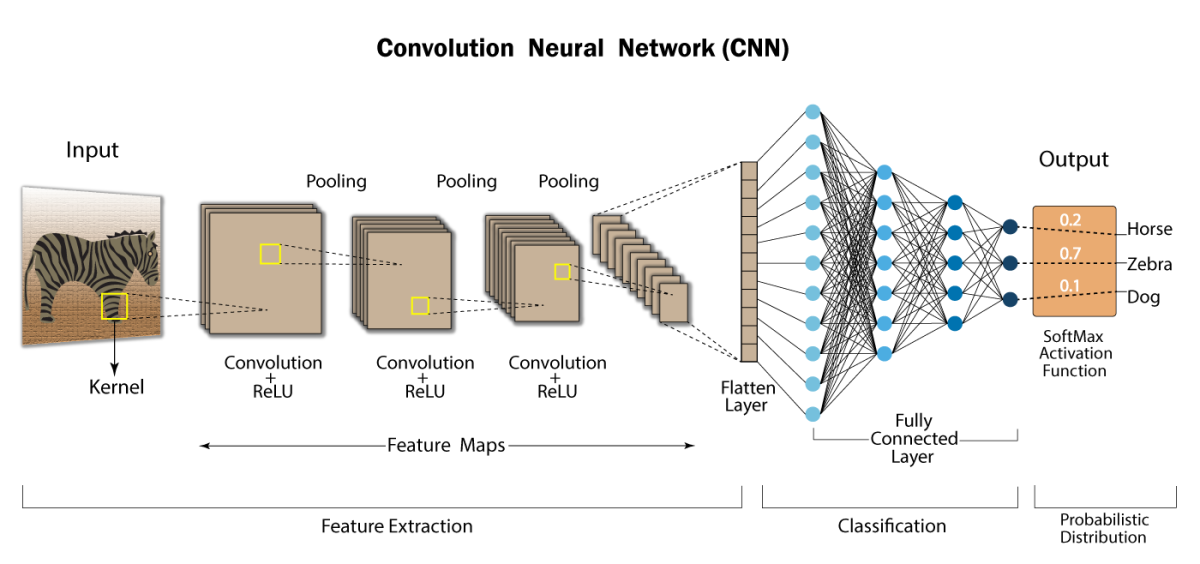

**Convolutional Layers** - warstwy splotowe są podstawą sieci konwolucyjnych CNN, ponieważ zawierają wyuczone filtry (kernele - małe macierze wag), które wyodrębniają cechy odróżniające od siebie różne obrazy. Filtry są przesuwane po obrazie (stride), a dla każdej lokalnej części obrazu obliczana jest suma iloczynów wag filtru i wartości piksel (co daje pojedynczą wartość na wynikowej mapie cech). Filters=256, oznacza to, że w tej warstwie zostanie zastosowanych 256 filtrów. Każdy filtr generuje osobną mapę cech wyjściowych. Wynikowa liczba map cech jest równa liczbie filtrów

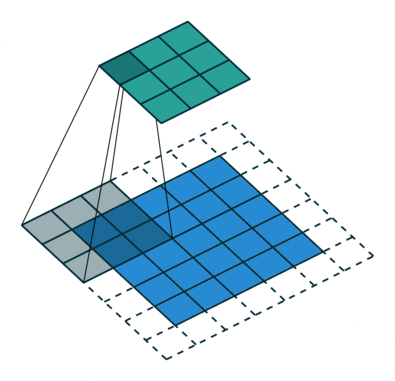



**Funkcja aktywacji:** Po przeprowadzeniu konwolucji i uzyskaniu mapy cech wyjściowej, zazwyczaj stosuje się funkcję aktywacji (np. ReLU - przepuszcza przez siebie wartości nieujemne (bez zmian) i zeruje wartości ujemne) w celu wprowadzenia nieliniowości (uczenie się bardziej złożonych i nieliniowych zależności) i zwiększenia zdolności uczenia się modelu

**Pooling Layers** - Sąsiednie piksele na obrazach mają zwykle podobne wartości, więc warstwy konwolucyjne zazwyczaj również generują podobne wartości dla sąsiednich pikseli w wyjściach. W rezultacie wiele informacji zawartych w danych wyjściowych warstwy konwolucyjnej (conv) jest zbędnych. Warstwy pooling stopniowo zmniejszają rozmiaru obrazu, co zmniejsza liczbę parametrów do wytrenowania. Więc skraca czas działania sieci i upraszcza nasz model.

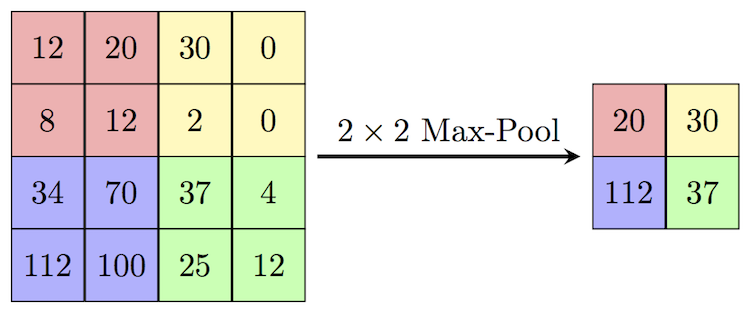

**Flatten layers** - służy do konwersji danych na tablice 1D w celu utworzenia pojedynczego wektora cechowego. W CNN obraz jest lepiej przetwarzany przez sieć neuronową, jeśli jest w formie 1D, a nie 2D

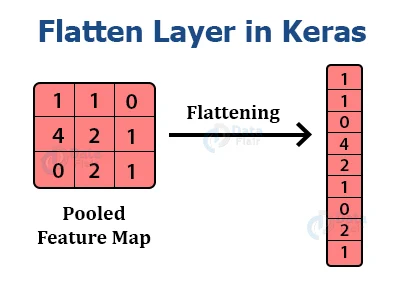

**Dropout** - jest to najpopularniejszy sposób do walki z przetrenowaniem w przypadku sieci neuronowych. Metoda ta jest bardzo efektywna, ponieważ co każde przejście losowo wyłączane są połączenia. Dzięki temu sieć neuronowa nie nauczy się „na pamięć” zbyt szybko, ponieważ architektura co przeliczenie odrobinę się zmienia poprzez zerowanie losowych połączeń neuronów.

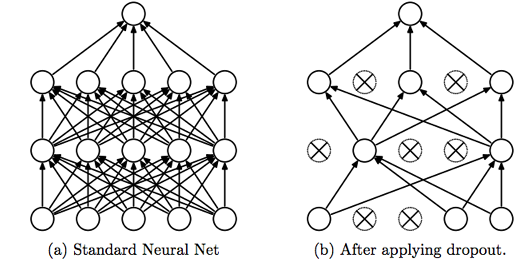

In [42]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
history = model.fit(train_ds, epochs=20)


Epoch 1/20
314/314 [==============================] - 526s 2s/step - loss: 1.0178 - accuracy: 0.6739
Epoch 2/20
314/314 [==============================] - 88s 273ms/step - loss: 0.5836 - accuracy: 0.7891
Epoch 3/20
314/314 [==============================] - 86s 264ms/step - loss: 0.3537 - accuracy: 0.8719
Epoch 4/20
314/314 [==============================] - 86s 263ms/step - loss: 0.2584 - accuracy: 0.9074
Epoch 5/20
314/314 [==============================] - 86s 267ms/step - loss: 0.1692 - accuracy: 0.9420
Epoch 6/20
314/314 [==============================] - 85s 265ms/step - loss: 0.1402 - accuracy: 0.9520
Epoch 7/20
314/314 [==============================] - 88s 270ms/step - loss: 0.1260 - accuracy: 0.9578
Epoch 8/20
314/314 [==============================] - 86s 268ms/step - loss: 0.0875 - accuracy: 0.9709
Epoch 9/20
314/314 [==============================] - 86s 267ms/step - loss: 0.0738 - accuracy: 0.9773
Epoch 10/20
314/314 [==============================] - 86s 267ms/step - los

Historia treningu:

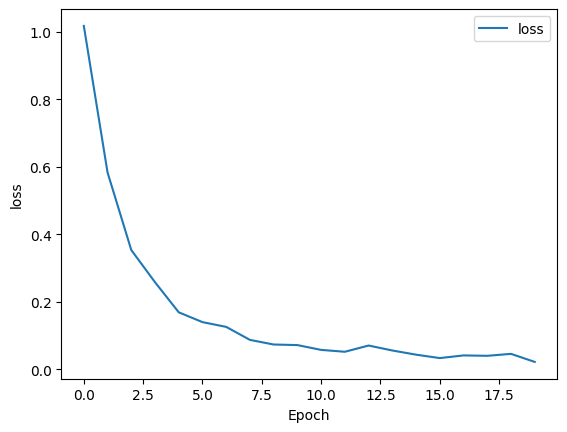

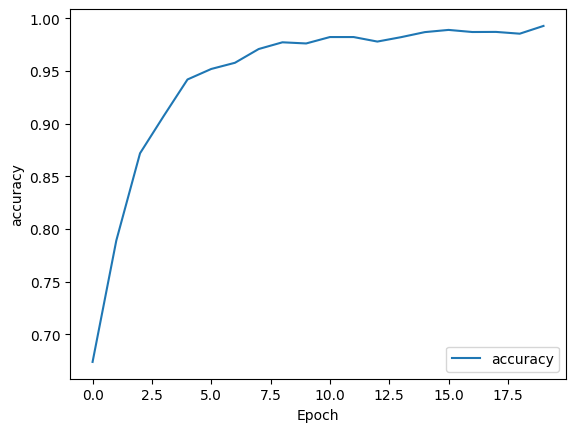

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

In [45]:
model.save("/content/drive/MyDrive/Colab Notebooks/DeepLearning/banana_strawberries_tomatoes_20_epochs.h5")


#3. Test

In [79]:
# Wczytaj model
model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/DeepLearning/banana_strawberries_tomatoes_working.h5")

# Wczytaj nowe dane testowe
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/DeepLearning/train_ds",
    labels='inferred', # automatyczne etykietowanie klas
    label_mode = 'categorical',
    image_size=(img_height, img_width),
    #batch_size=32, %default
    shuffle=True, # wymieszanie danych przed kazdą epoką treningową
    seed=123, # ziarno dla generatora liczb losowych
    color_mode='rgb'
)


Found 14332 files belonging to 8 classes.


In [80]:
model.evaluate(test_ds)

448/448 [==============================] - 601s 1s/step - loss: 0.3701 - accuracy: 0.8844


[0.37011048197746277, 0.8843845725059509]

448/448 [==============================] - 131s 287ms/step


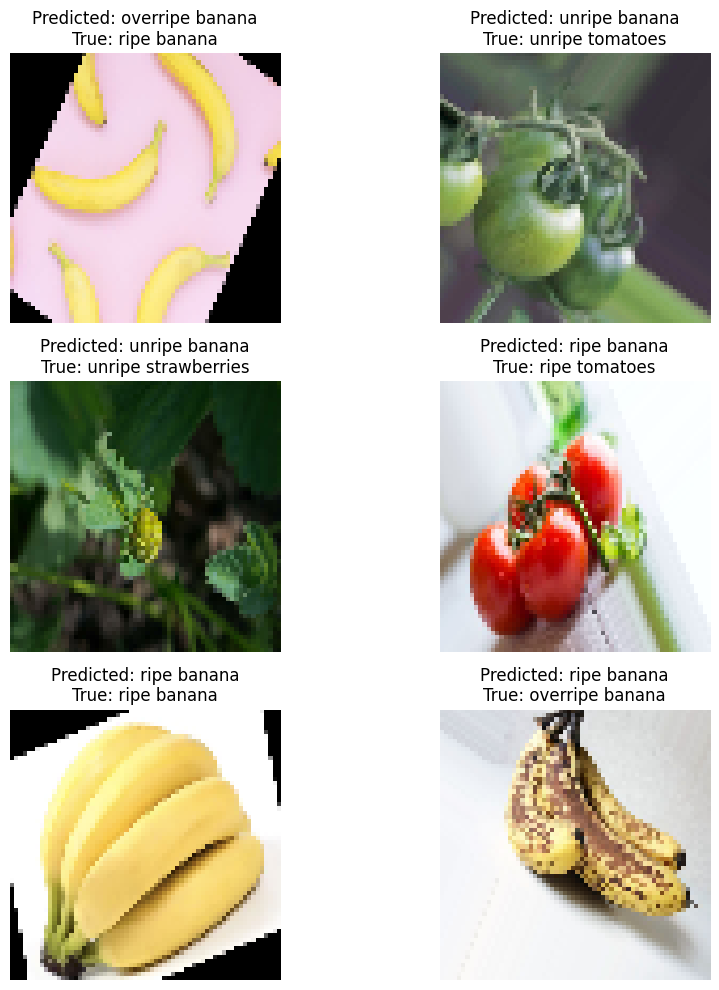

In [85]:
import matplotlib.pyplot as plt

# Dokonaj predykcji na nowych danych
predictions = model.predict(test_ds)
predicted_labels = tf.argmax(predictions, axis=1)

# Wyświetl przewidziane etykiety i obrazy
class_names = test_ds.class_names

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(test_ds.take(6)):
    ax = plt.subplot(3, 2, i + 1)
    plt.imshow(image[0].numpy().astype("uint8"))
    predicted_label = class_names[predicted_labels[i]]
    true_label_index = tf.argmax(label[0]).numpy()
    true_label = class_names[true_label_index]
    plt.title(f"Predicted: {predicted_label}\nTrue: {true_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()

